# PREDECTIVE ANALYSIS PROJECT

# BUSSINESS PROBLEM UNDERSTANDING

**PowerCo - a major gas and electricity utility that supplies to small and medium sized enterprises.**

**The energy market has had a lot of change in recent years and there are more options than ever for customers to choose from.**

**PowerCo are concerned about their customers leaving for better offers from other energy providers.**

When a customer leaves to use another service provider, this is called churn.

**This is becoming a big issue for PowerCo and they have engaged BCG to help diagnose the reason why their customers are churning.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
client_data = pd.read_csv("C:\\Users\\saisu\\Downloads\\client_data (1).csv")

In [3]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_data = pd.read_csv("C:\\Users\\saisu\\Downloads\\price_data (1).csv")

In [5]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# DATA DESCRIPTION|

**CLIENT_DATA**

id = client company identifier

activity_new = category of the company’s activity

channel_sales = code of the sales channel

cons_12m = electricity consumption of the past 12 months

cons_gas_12m = gas consumption of the past 12 months

cons_last_month = electricity consumption of the last month

date_activ = date of activation of the contract

date_end = registered date of the end of the contract

date_modif_prod = date of the last modification of the product

date_renewal = date of the next contract renewal

forecast_cons_12m = forecasted electricity consumption for next 12 months

forecast_cons_year = forecasted electricity consumption for the next calendar year

forecast_discount_energy = forecasted value of current discount

forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

has_gas = indicated if client is also a gas client

imp_cons = current paid consumption

margin_gross_pow_ele = gross margin on power subscription

margin_net_pow_ele = net margin on power subscription

nb_prod_act = number of active products and services

net_margin = total net margin

num_years_antig = antiquity of the client (in number of years)

origin_up = code of the electricity campaign the customer first subscribed to

pow_max = subscribed power

churn = has the client churned over the next 3 months

**PRICE_DATA**


id = client company identifier

price_date = reference date

price_off_peak_var = price of energy for the 1st period (off peak)

price_peak_var = price of energy for the 2nd period (peak)

price_mid_peak_var = price of energy for the 3rd period (mid peak)

price_off_peak_fix = price of power for the 1st period (off peak)

price_peak_fix = price of power for the 2nd period (peak)

price_mid_peak_fix = price of power for the 3rd period (mid peak)

# DESCRIPTIVE STATISTICS 

In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [9]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

**statistics**

In [10]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
client_data.shape

(14606, 26)

In [13]:
price_data.shape

(193002, 8)

In [14]:
client_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [15]:
price_data.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

# DATA VISUALIZATION

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

# CHURN

In [17]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

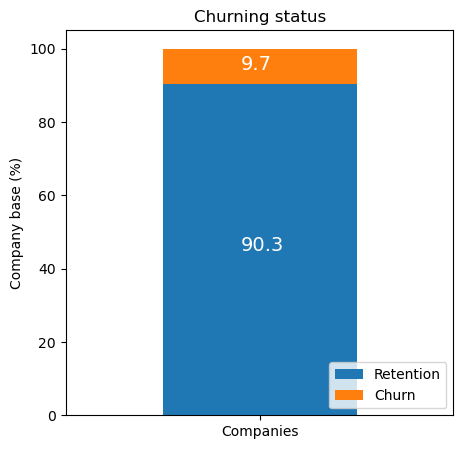

In [18]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of the total customers have churned.

In [19]:
channel = client_data[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

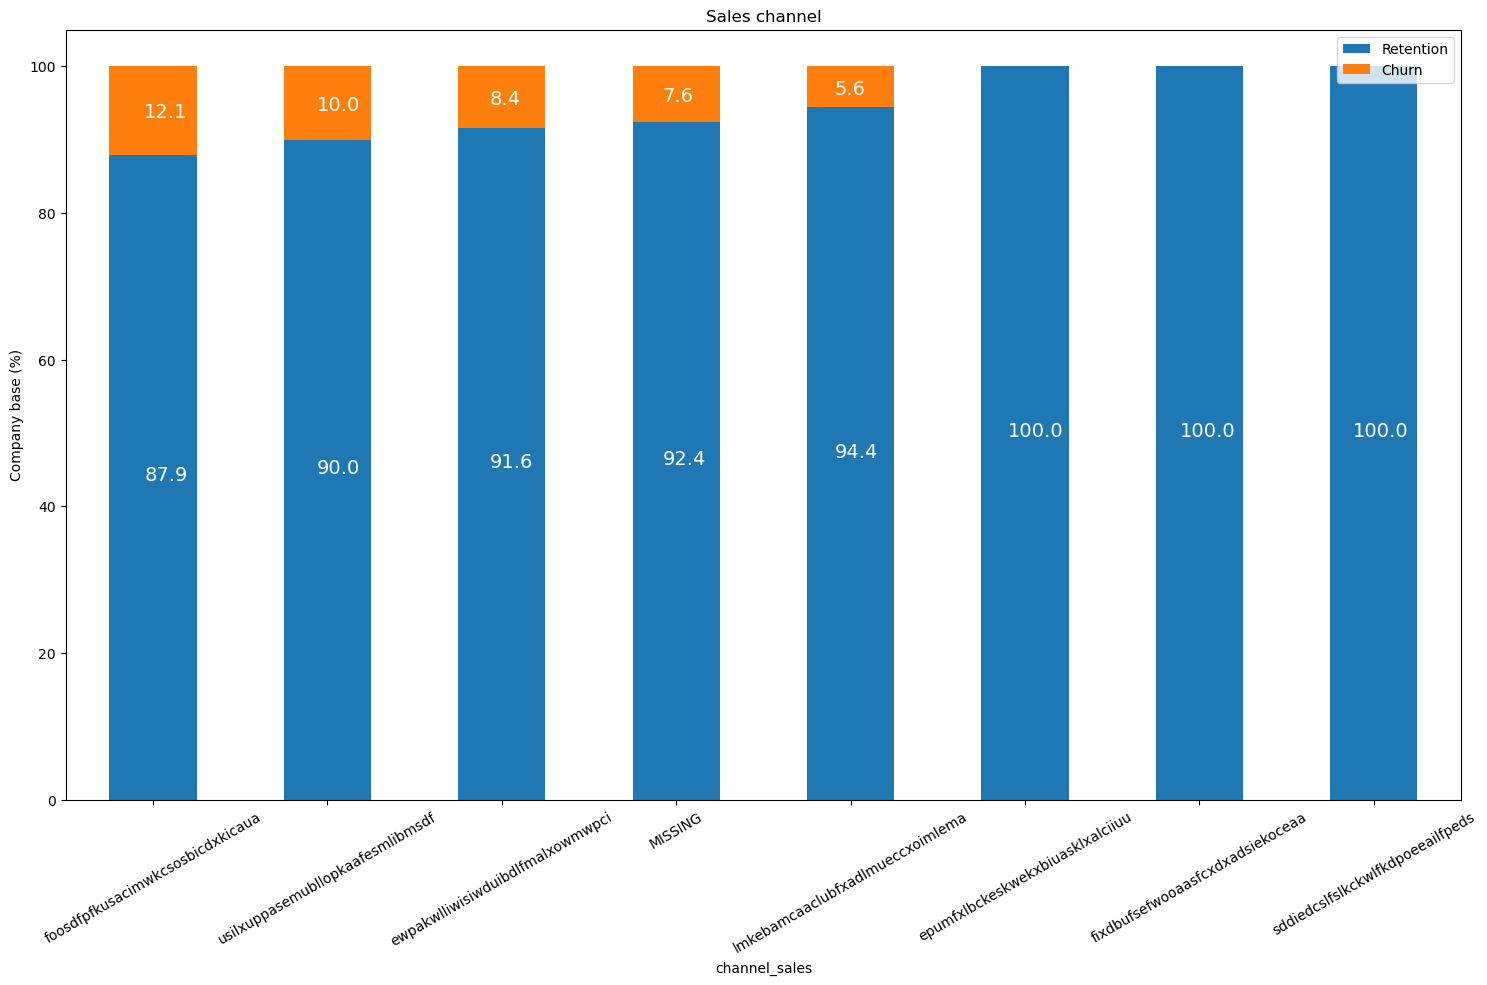

In [20]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

 the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

# Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [21]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [22]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

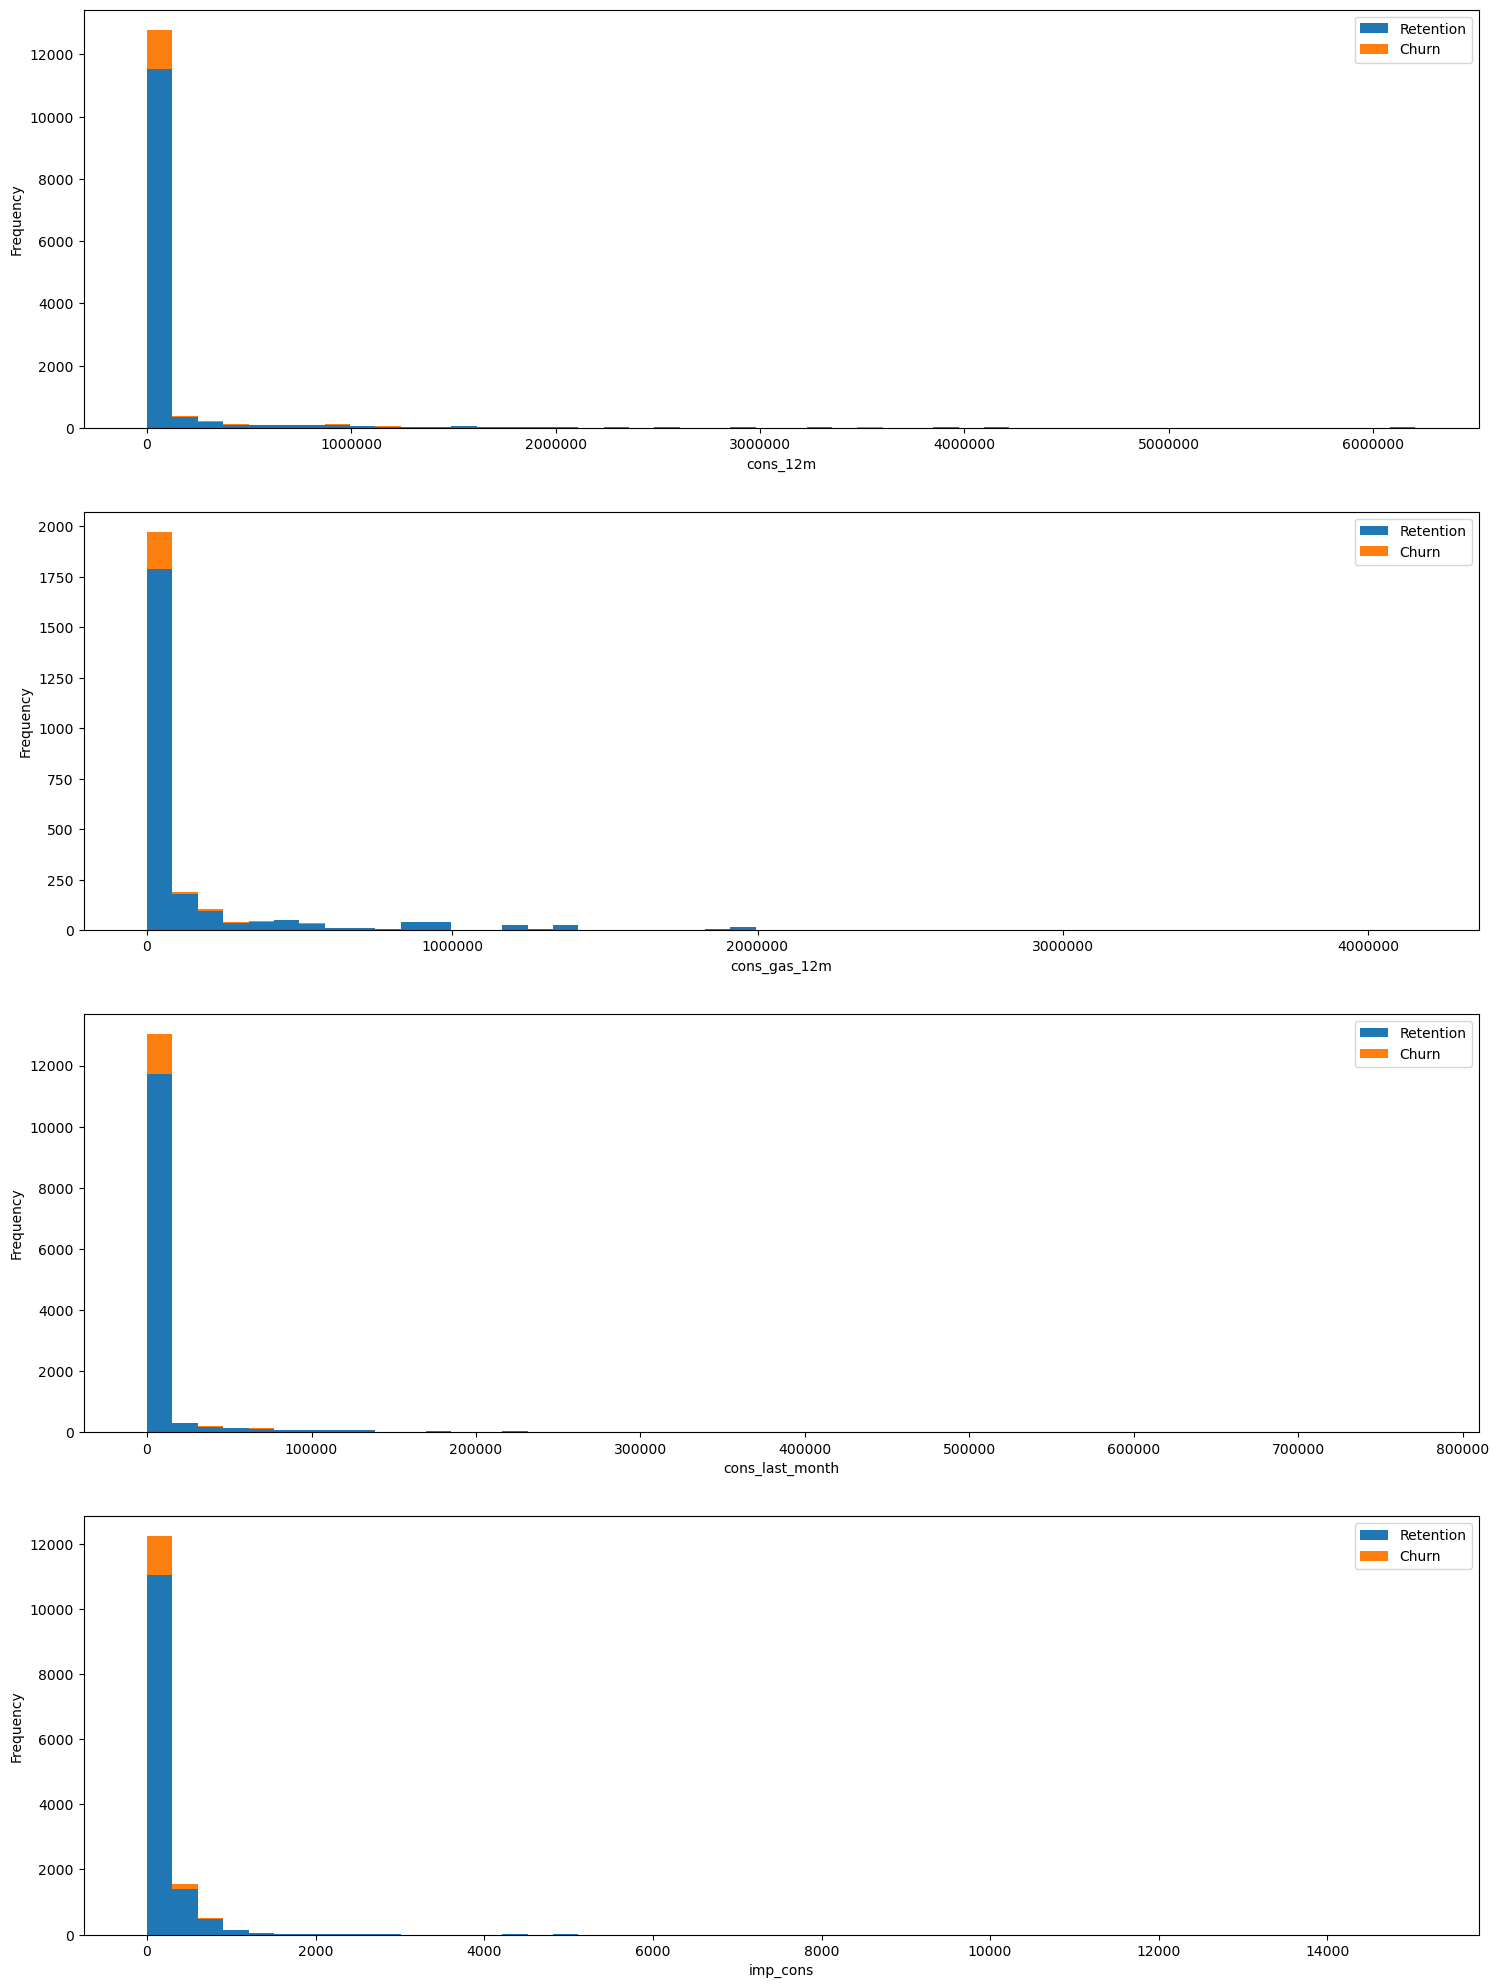

In [23]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:

Minimum
First quartile (Q1)
Median
Third quartile (Q3)
Maximum
It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

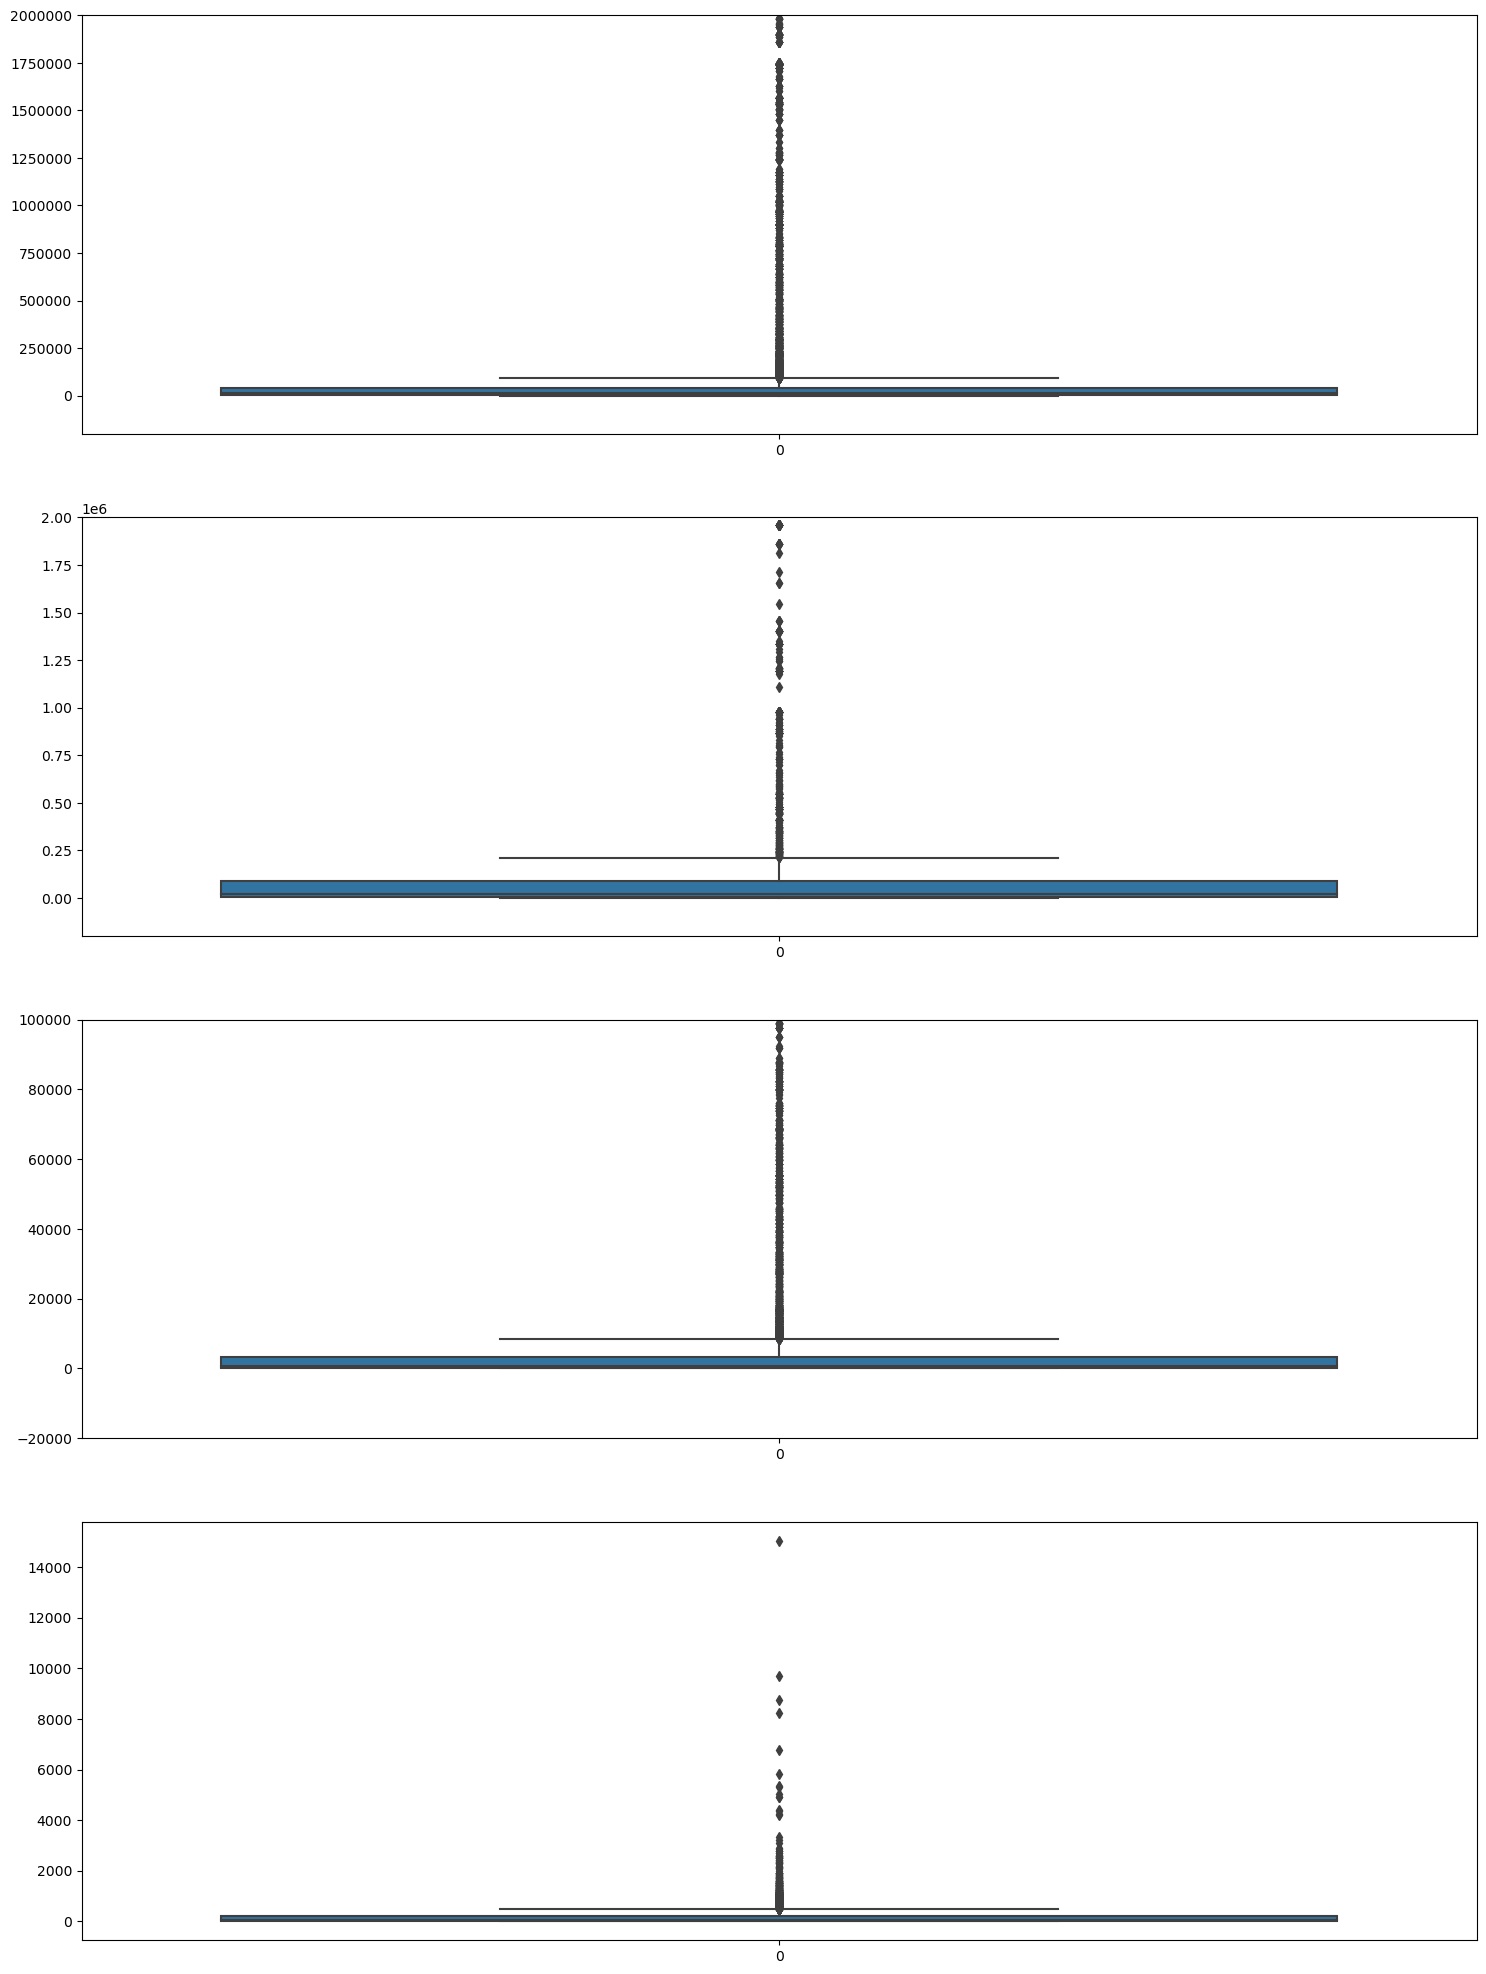

In [24]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='y')
    # Set x-axis limit
    axs[0].set_ylim(-200000, 2000000)
    axs[1].set_ylim(-200000, 2000000)
    axs[2].set_ylim(-20000, 100000)
    plt.show()


We will deal with skewness and outliers during feature engineering in the next exercise.

# Forecast

In [25]:
forecast = client_data[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

In [26]:
forecast

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0
...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,0
14602,d0a6f71671571ed83b2645d23af6de00,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0


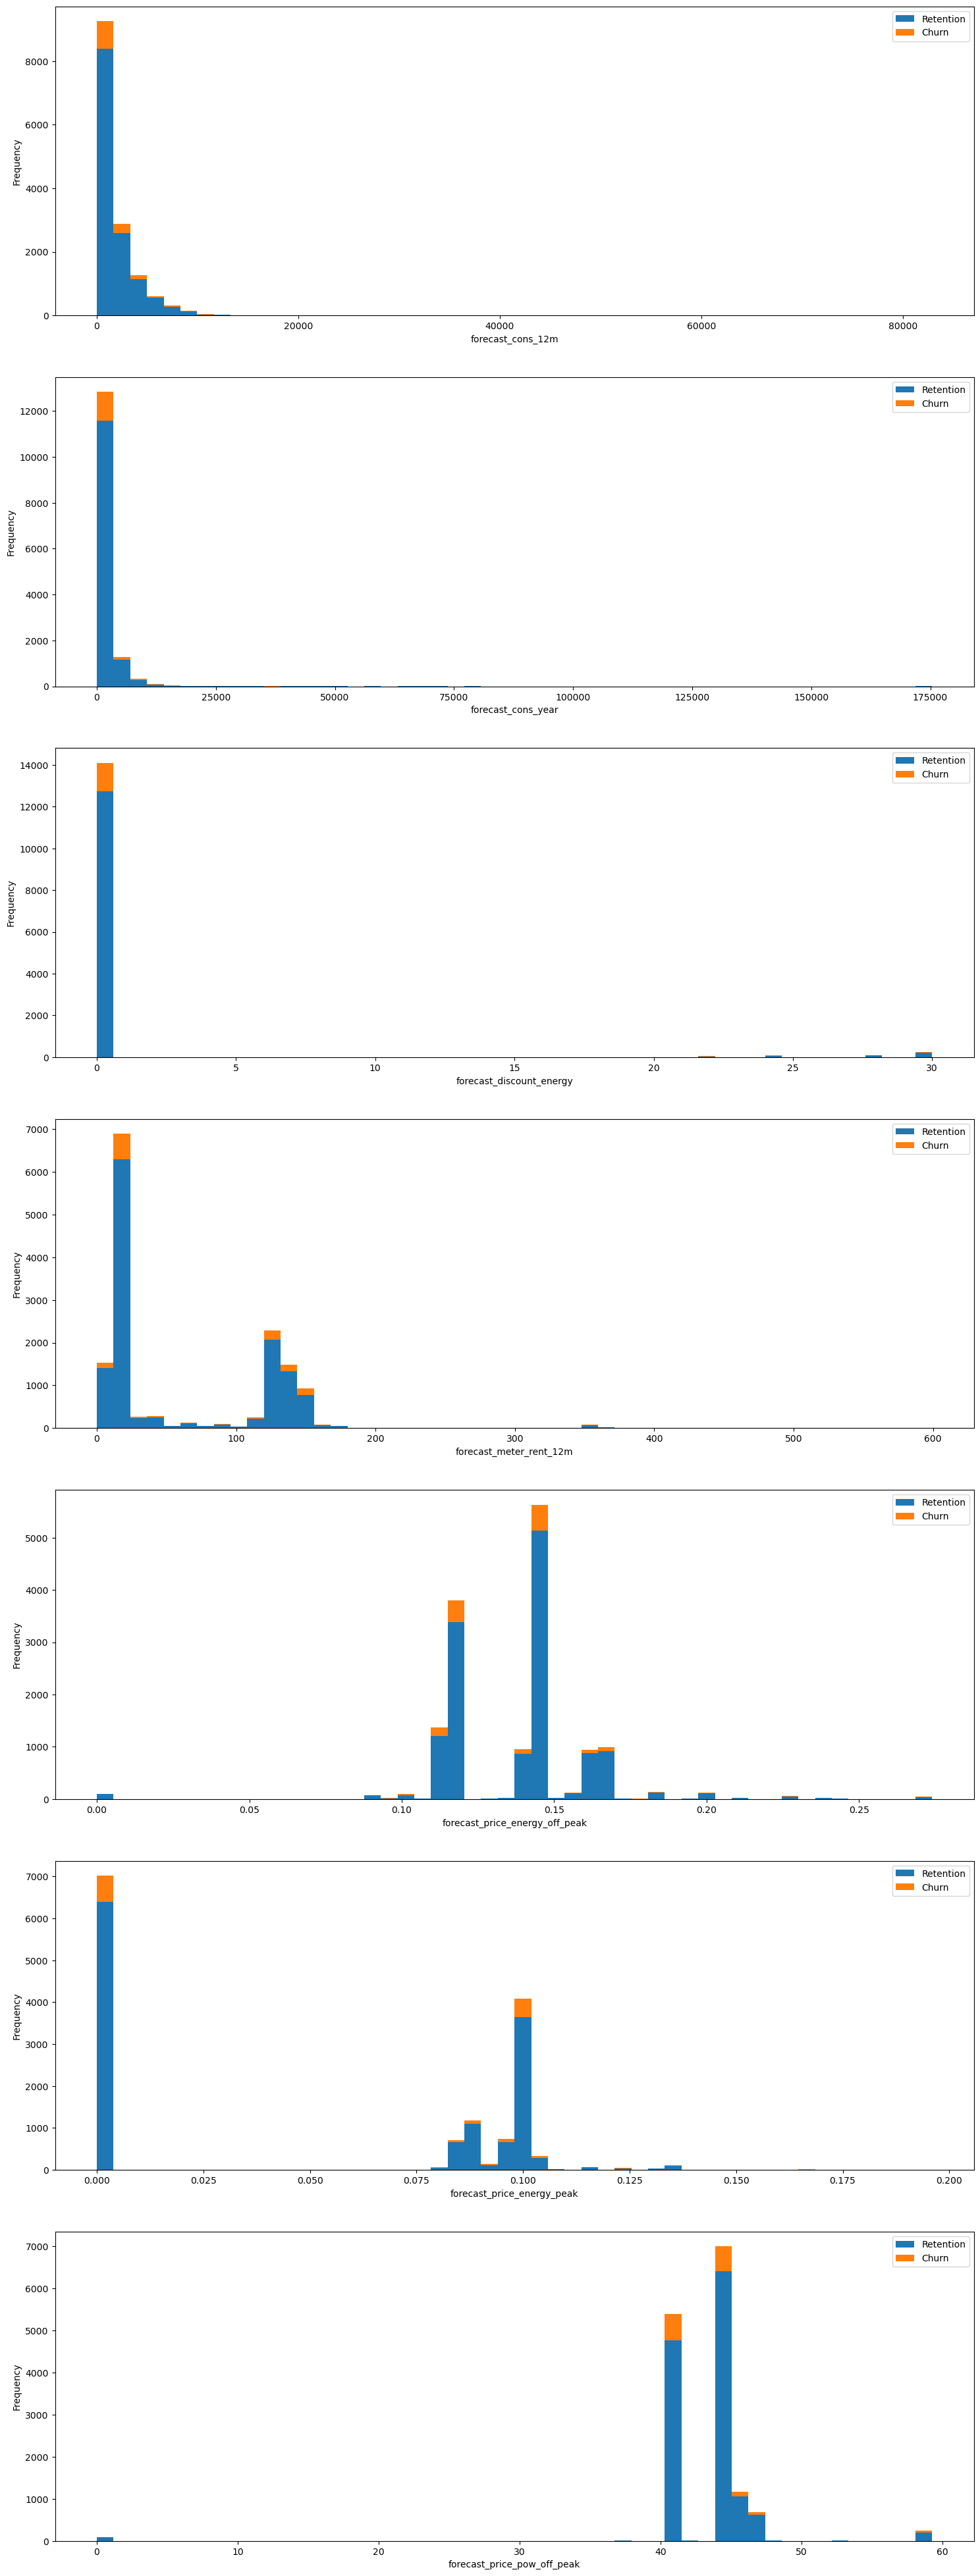

In [27]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

# contract type

In [28]:
contract_type = client_data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

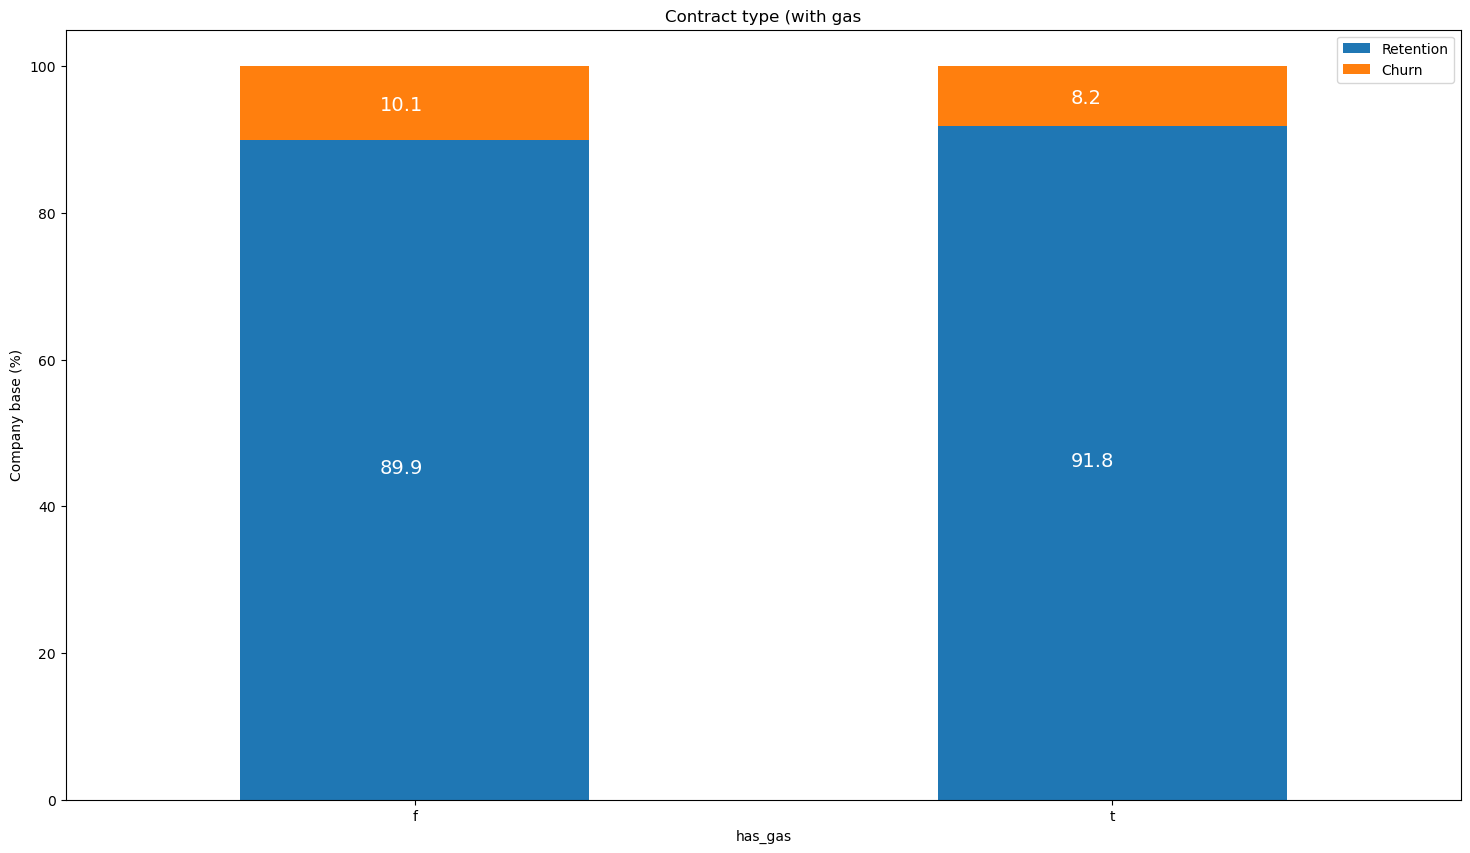

In [29]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

# Margins

In [30]:
margin = client_data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

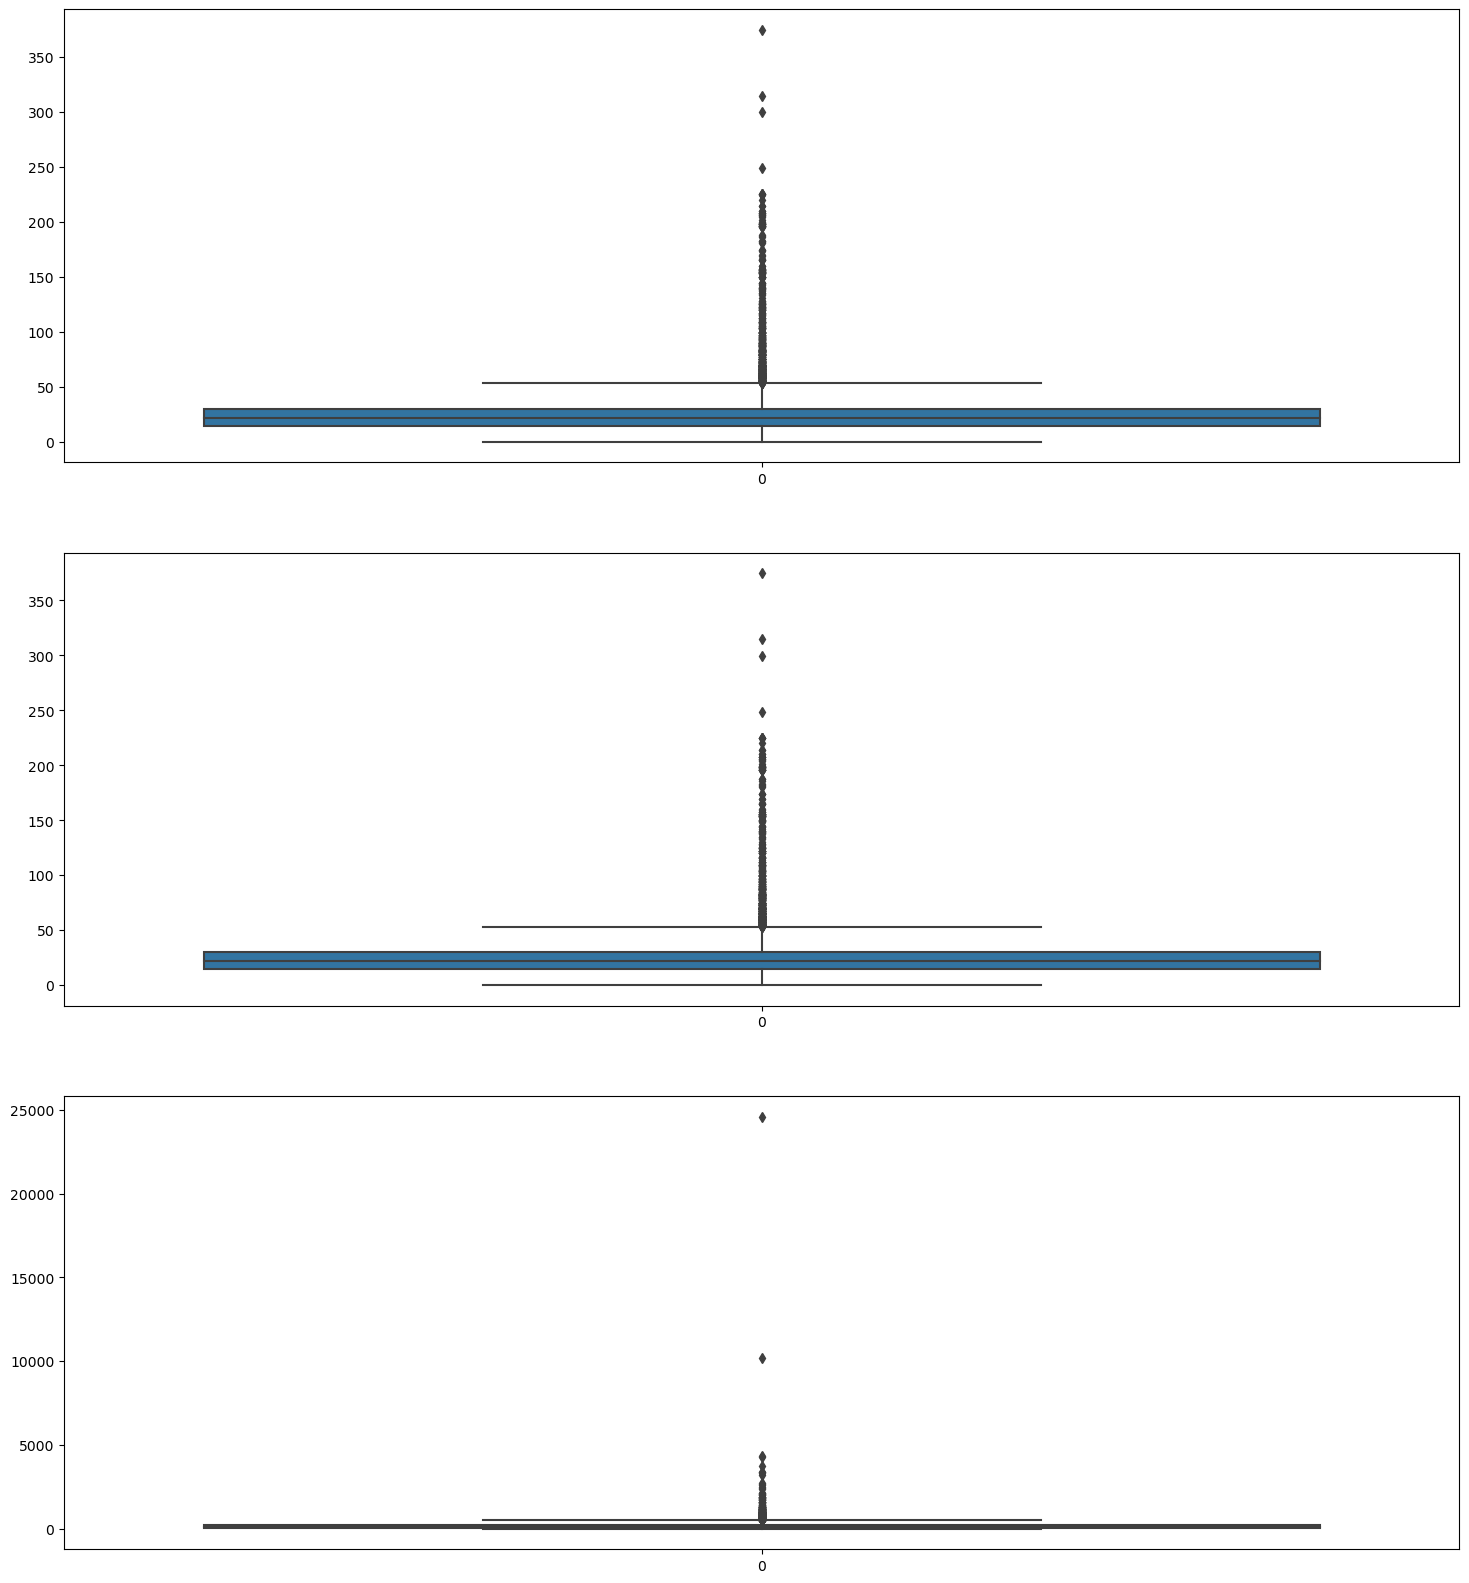

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='y')
axs[1].ticklabel_format(style='plain', axis='y')
axs[2].ticklabel_format(style='plain', axis='y')
plt.show()

We can see some outliers here as well which we will deal with in the next exercise.


# Subscribed power

In [32]:
power = client_data[['id', 'pow_max', 'churn']]

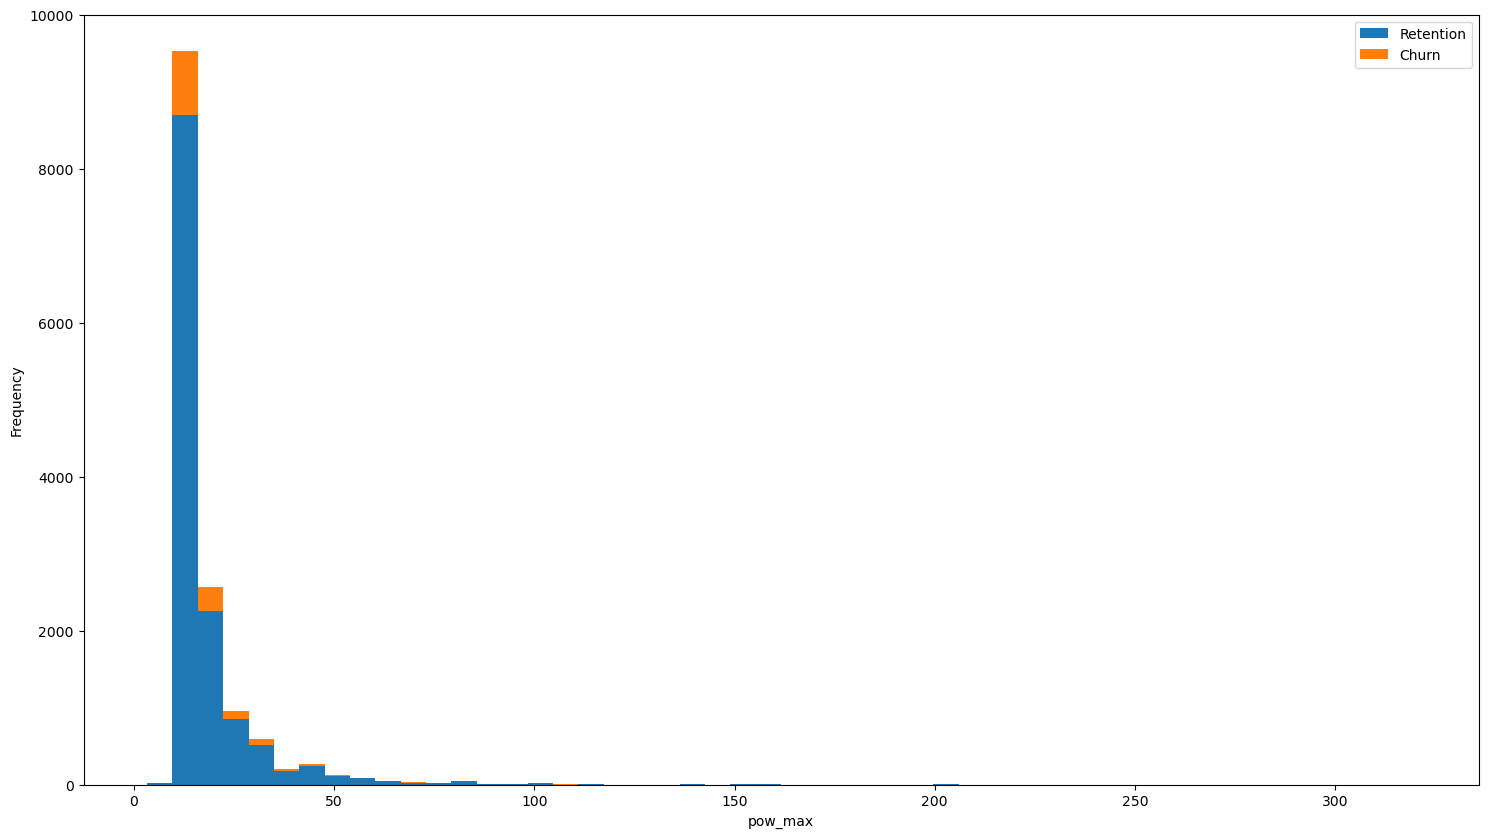

In [33]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

# other columns

In [34]:
others = client_data[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

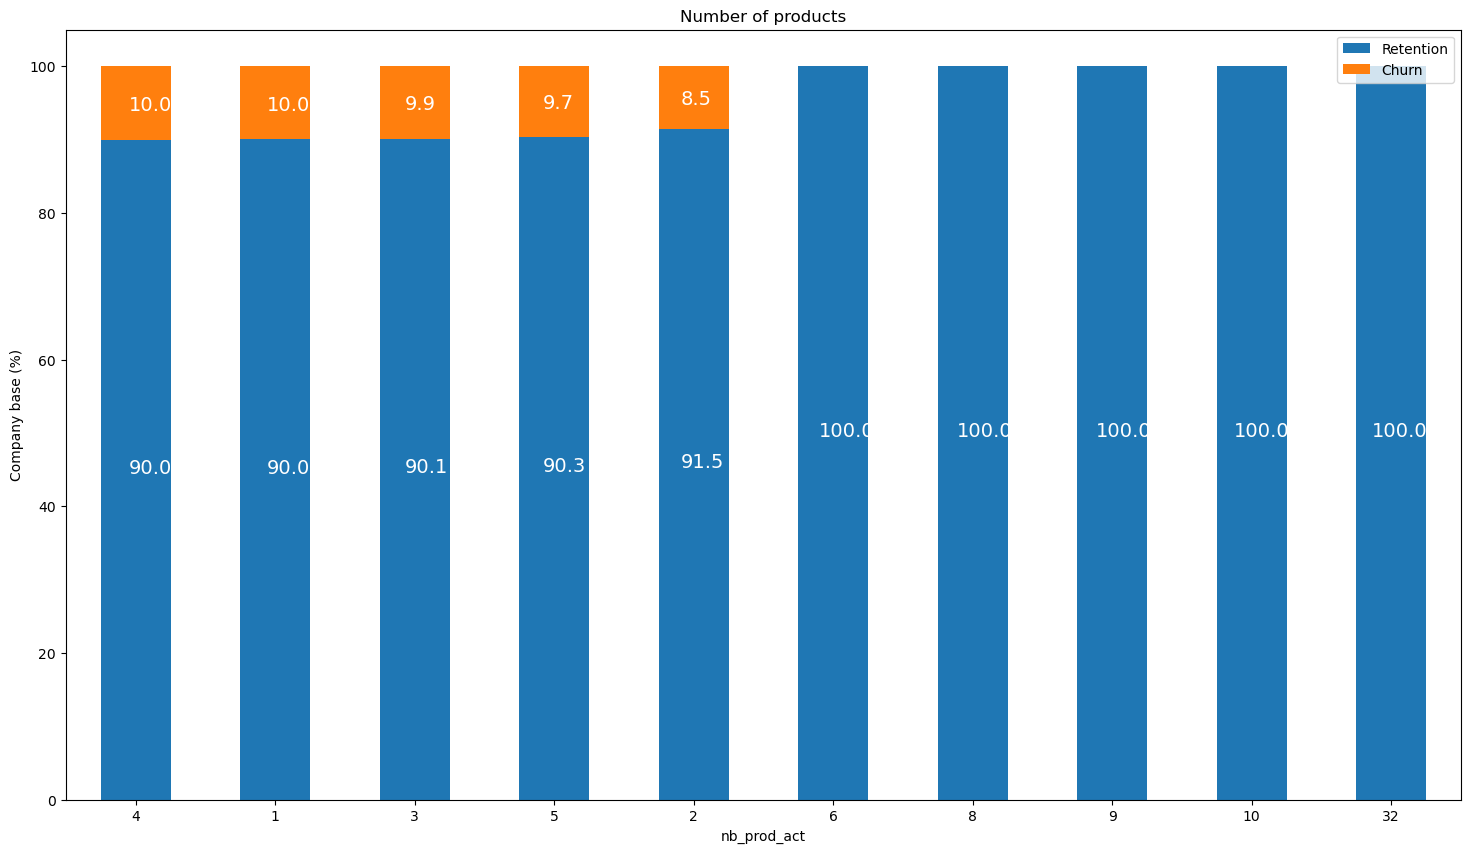

In [35]:
plot_stacked_bars(products_percentage, "Number of products")

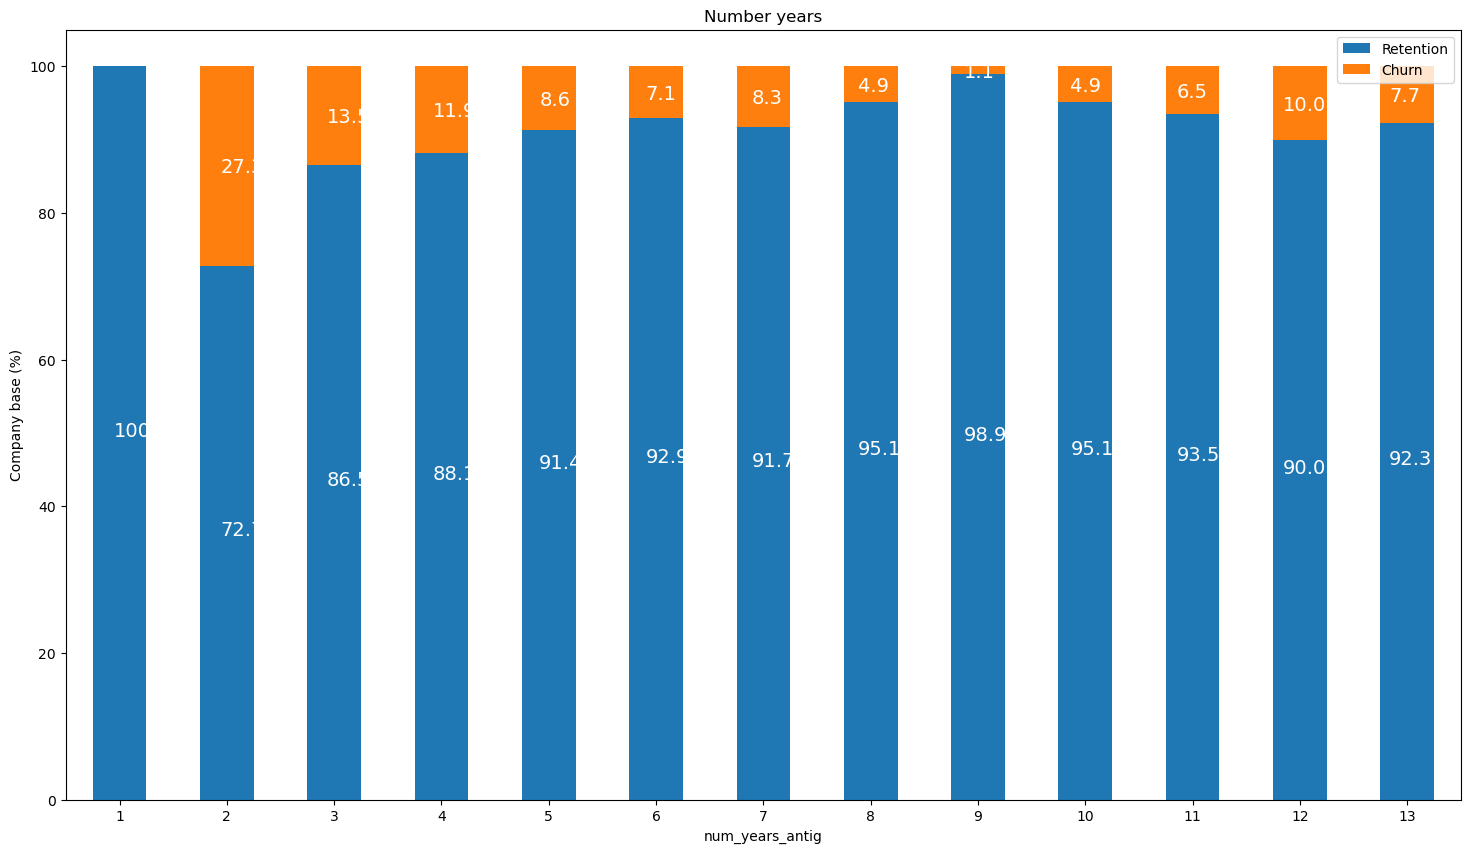

In [36]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

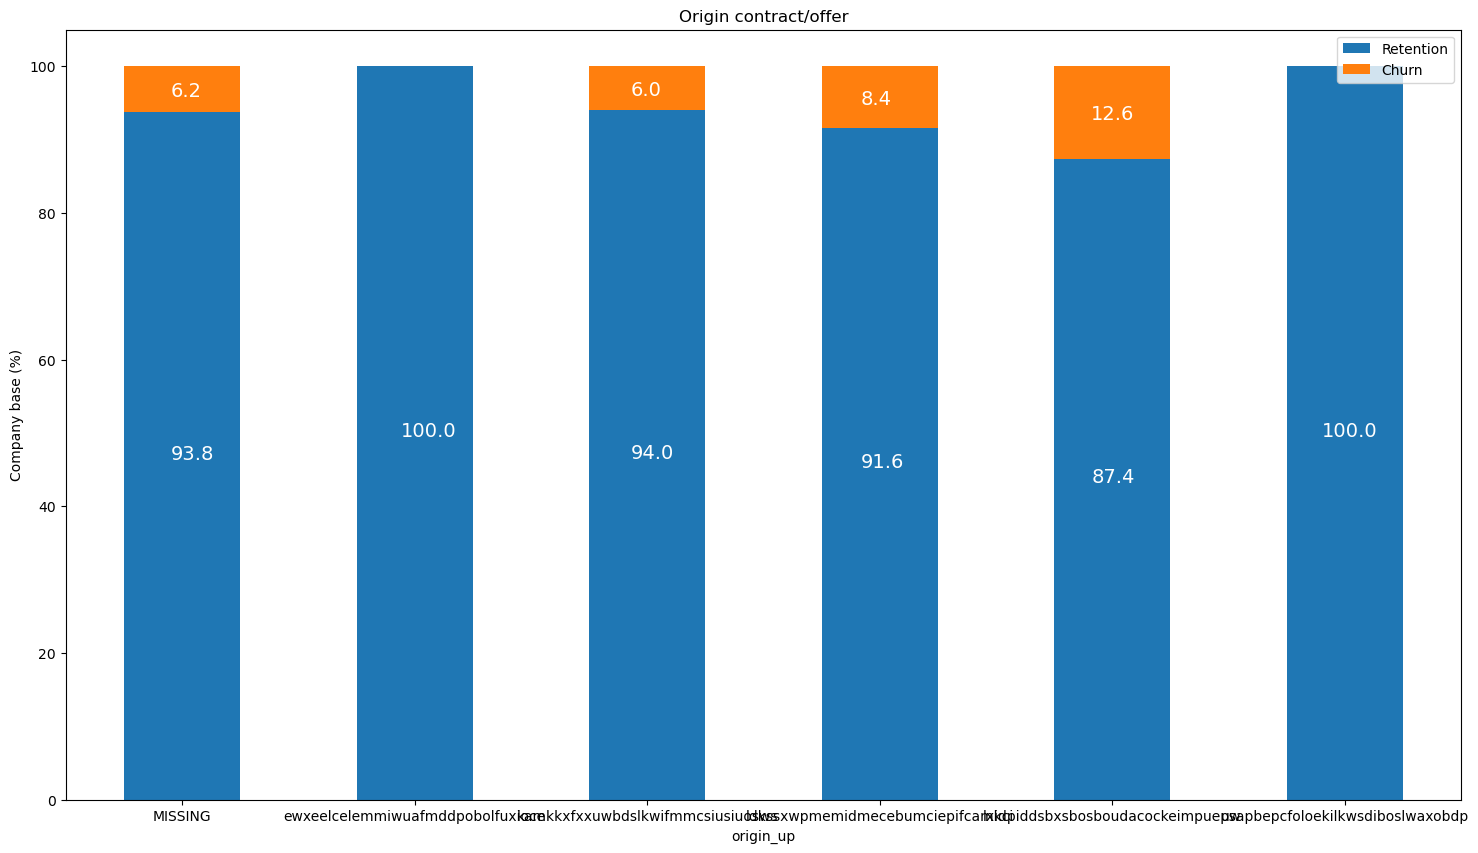

In [37]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# MODELLING

In [4]:
#predction data 
pred = pd.read_csv('C:\\Users\\saisu\\Downloads\\data_for_predictions.csv')

In [39]:
pred

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,...,7,19,0,0,1,0,0,0,0,1
14602,14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,...,40,4,0,0,1,0,0,0,0,1
14603,14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,...,46,10,0,0,1,0,0,0,0,1
14604,14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,...,40,4,0,0,1,0,0,0,0,1


In [40]:
pred.drop(columns=["Unnamed: 0"],inplace = True)

In [41]:
pred.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [5]:
X = pred.drop(columns=['id', 'churn'])
y = pred["churn"]

In [59]:
X.shape

(14606, 61)

In [60]:
y.shape

(14606,)

In [49]:
Train = []
Test = []
CV = []

for i in range(0,50):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.linear_model import LogisticRegression 
    log_default =  LogisticRegression()
    log_default.fit(X_train,y_train)
    
    ypred_train =  log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

    
em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]

print("best random_state number:",rs)

best random_state number: 37


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=37)

In [62]:
X_train.shape

(10954, 61)

In [63]:
y_train.shape

(10954,)

In [64]:
X_test.shape

(3652, 61)

In [65]:
y_test.shape

(3652,)

# METHOD-1

# logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression 
log_model =  LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train =  log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9056965492057696
cross validation score: 0.9050575517528119
Test Accuracy: 0.8923877327491785


# decision tree classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
             "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)
#identify the best model
dt = dt_grid.best_estimator_

#identify the importance of each feature 
dt_fi = dt.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(dt_fi) if x>0]
#create new dataset with important features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

#train with best model & with important features

dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(dt,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    



Train Accuracy: 0.9063355851743655
cross validation score: 0.9063355903874089
Test Accuracy: 0.8923877327491785


# random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=37)
param_grid =  {"n_estimators":list(range(1,10))}

from sklearn.model_selection import GridSearchCV
rf_model = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
rf_model.fit(X_train,y_train)

#identify the best model
rf = rf_model.best_estimator_

rf.feature_importances_

#identify the importance of each feature 
rf_fi = rf.feature_importances_

#identify the features where the features importance is greater than 0

index=[i for i,x in enumerate(rf_fi) if x>0]

#create new dataset with important features
X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

#train with best model & with important features

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(rf,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    


Train Accuracy: 0.9800073032682125
cross validation score: 0.9066092712195386
Test Accuracy: 0.8893756845564075


# ada bosst classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=37)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_model = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
ab_model.fit(X_train,y_train)

#identify the best model
ab = ab_model.best_estimator_

#identify the importance of each feature 
ab_fi = ab.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(ab_fi) if x>0]

#create new dataset with important features
X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

#train with best model & with important features

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(ab,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.9063355851743655
cross validation score: 0.9064269145883219
Test Accuracy: 0.8923877327491785


# gradiant boost classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier (random_state=37)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

#identify the best model
gb = gb_grid.best_estimator_

#identify the importance of each feature 
gb_fi = gb.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(gb_fi) if x>0]

#create new dataset with important features
X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

#train with best model & with important features

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(gb,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.9063355851743655
cross validation score: 0.9063355903874089
Test Accuracy: 0.8923877327491785


#  xgboost classifier

In [60]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)

#identify the best model
xgb = xgb_grid.best_estimator_

#identify the importance of each feature 
xgb_fi = xgb.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(xgb_fi) if x>0]

#create new dataset with important features
X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

#train with best model & with important features

xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(xgb,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.9584626620412635
cross validation score: 0.9122696210525
Test Accuracy: 0.8970427163198248


# METHOD-2

In [9]:
# List of classifier models

classifiers = {

    'RandomForest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),

     'KNN': KNeighborsClassifier(),

     'LogisticRegression': LogisticRegression(max_iter=100),

     'Decision Tree': DecisionTreeClassifier(),
     
     'Adaboost classifier':AdaBoostClassifier(),
     
     'Gradientboosting classifier':GradientBoostingClassifier(),
     
      'XGB Classifier': XGBClassifier()
    
      
}

results = pd.DataFrame(columns=['Accuracy', 'Bias', 'variance'])

for method, cls in classifiers.items():

#train the classifier

    cls.fit(X_train,y_train)

#Predicting the test set results

    y_pred = cls.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    bias = cls.score(X_train,y_train)

    variance = cls.score(X_test, y_test)

    results.loc[method]=[acc, bias, variance]

#Making the Confusion matrix

    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(y_test,y_pred)

In [10]:
results

,Accuracy,Bias,variance
RandomForest,0.895400,0.999726,0.895400
Support Vector Machine,0.892388,0.906427,0.892388
KNN,0.886911,0.909439,0.886911
LogisticRegression,0.892388,0.906153,0.892388
Decision Tree,0.825575,1.000000,0.825575
Adaboost classifier,0.892388,0.906609,0.892388
Gradientboosting classifier,0.891840,0.911174,0.891840
XGB Classifier,0.898138,0.984754,0.898138


# Evaluation


Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

Accuracy = the ratio of correctly predicted observations to the total observations
Precision = the ability of the classifier to not label a negative sample as positive
Recall = the ability of the classifier to find all the positive samples
The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

# confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,ypred_test)
cm

array([[3257,    2],
       [ 391,    2]], dtype=int64)

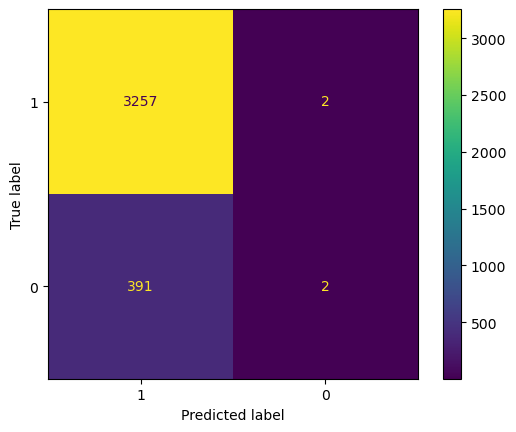

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels
                       =pred["churn"].unique()).plot()
plt.show()

# classification report

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3259
           1       0.50      0.01      0.01       393

    accuracy                           0.89      3652
   macro avg       0.70      0.50      0.48      3652
weighted avg       0.85      0.89      0.84      3652



# Roc curve

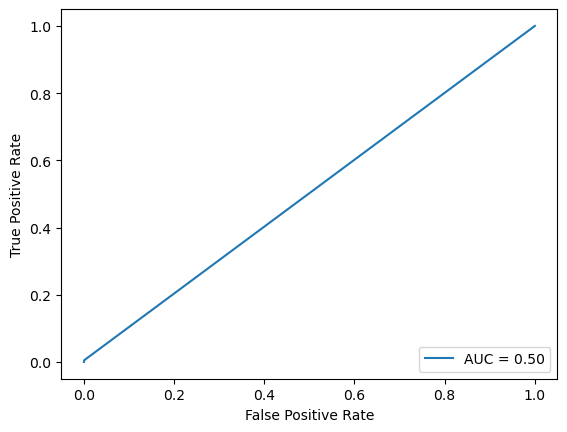

In [72]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# auc score

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.502237686672335

In [74]:
y_test.value_counts()

0    3259
1     393
Name: churn, dtype: int64

Looking at these results there are a few things to point out:


Looking at the true negatives, we have 3257 out of 3259. This means that out of all the negative cases (churn = 0), we predicted 3238 as negative (hence the name True negative). This is great!

Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 391, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.

Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 2 cases, which is great!

With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 2 of those 393, which is very poor.

Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

Looking at the precision score, this shows us a score of 0.82 which is not bad, but could be improved.

However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners.

A data scientist at this point would go back to feature engineering to try and create more predictive features. They may also experiment with optimising the parameters within the model to improve performance. For now, lets dive into understanding the model a little more.



# PREDICTIONS

In [77]:
from pickle import dump
dump(log_model, open('log_model.pkl','wb'))

In [78]:
from pickle import load 
loaded_model = load(open('log_model.pkl','rb'))
loaded_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
X_test

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
7733,3.932829,0.0,2.728354,2.945852,0.0,1.321805,0.161165,0.083909,44.311378,0,...,18,6,0,0,1,0,0,0,0,1
8109,4.644054,0.0,3.631139,3.657518,0.0,2.116375,0.116509,0.101397,40.606701,0,...,7,2,0,0,0,1,0,0,0,1
289,5.808274,0.0,4.542776,3.021970,0.0,2.123067,0.120372,0.103487,40.606701,0,...,70,10,0,0,0,1,0,1,0,0
13658,3.527759,0.0,2.513218,2.707817,0.0,1.284882,0.146694,0.000000,44.311378,0,...,45,9,0,0,1,0,0,0,0,1
9604,4.078493,0.0,0.000000,3.158818,0.0,1.021603,0.164057,0.086803,44.311378,0,...,66,4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,4.347252,0.0,3.081707,2.977728,0.0,1.315760,0.145711,0.000000,44.311378,0,...,78,6,1,0,0,0,0,0,1,0
5937,3.766190,0.0,3.003461,2.353108,0.0,1.212454,0.146348,0.000000,46.305378,0,...,74,2,0,0,1,0,0,1,0,0
4417,3.443106,0.0,2.008600,2.429397,0.0,2.123231,0.114088,0.098969,41.271364,0,...,2,1,0,0,1,0,0,1,0,0
9849,3.609381,0.0,0.000000,2.642771,0.0,2.075109,0.120372,0.103487,40.606701,0,...,69,9,0,0,1,0,0,0,0,1


In [80]:
X_test["churn_probability"] = loaded_model.predict(X_test)

In [82]:
X_test

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn_probability
7733,3.932829,0.0,2.728354,2.945852,0.0,1.321805,0.161165,0.083909,44.311378,0,...,6,0,0,1,0,0,0,0,1,0
8109,4.644054,0.0,3.631139,3.657518,0.0,2.116375,0.116509,0.101397,40.606701,0,...,2,0,0,0,1,0,0,0,1,0
289,5.808274,0.0,4.542776,3.021970,0.0,2.123067,0.120372,0.103487,40.606701,0,...,10,0,0,0,1,0,1,0,0,0
13658,3.527759,0.0,2.513218,2.707817,0.0,1.284882,0.146694,0.000000,44.311378,0,...,9,0,0,1,0,0,0,0,1,0
9604,4.078493,0.0,0.000000,3.158818,0.0,1.021603,0.164057,0.086803,44.311378,0,...,4,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,4.347252,0.0,3.081707,2.977728,0.0,1.315760,0.145711,0.000000,44.311378,0,...,6,1,0,0,0,0,0,1,0,0
5937,3.766190,0.0,3.003461,2.353108,0.0,1.212454,0.146348,0.000000,46.305378,0,...,2,0,0,1,0,0,1,0,0,0
4417,3.443106,0.0,2.008600,2.429397,0.0,2.123231,0.114088,0.098969,41.271364,0,...,1,0,0,1,0,0,1,0,0,0
9849,3.609381,0.0,0.000000,2.642771,0.0,2.075109,0.120372,0.103487,40.606701,0,...,9,0,0,1,0,0,0,0,1,0


In [84]:
X_test.to_csv("Churn_predictions2.csv")

# conclusion

 the best model for prediction is **LOGISTIC REGRESSION**

# observations

Churn is indeed high in the SME division  **4.4%** across 14606 customers

Predictive model is able to predict churn but the 
main driver is not customer price sensitivity



# SUGGESTIONS

 • Yearly consumption, forecasted consumption 
and net margin are the 3 largest drivers

Discount strategy of 20% is effective but only if 
targeted appropriately

• Offer discount to only to high
-value customers with high churn probability